# Lab 3 - Filter Design Problems

Spencer Y. Ki

Prof. D. Jones

PHY408H1S

Wednesday, the 22nd of March, 2023.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# A Notch Digital Filter (6 marks, 3/2/1)
Collaborators: None (Internet references for math help:

- https://dsp.stackexchange.com/questions/52522/stability-of-system-with-poles-inside-unit-circle-conflict-with-differential-e

)

A notch filter is a filter that passes almost all frequencies with unit amplitude, except for a narrow
range of frequencies centered on the rejection frequency $f_0$ (at which frequency nothing is passed).

A simple notch digital filter has a z-transform

$$ W(z) = MF(z) F(z^*)^* = M \frac{z - q}{z - p} \frac{z - q^*}{z - p^*} $$

where $M$ is a normalization factor, $q = e^{-i 2 \pi f_0 / f_s}$, $p = (1 + \epsilon) q$, $f_s$ 
is the sampling rate ($f_s = 1 / \Delta$) and $\epsilon$ is a small positive number ($0 < \epsilon \ll 1$).

 1. What are the poles and zeros of this system? Where are they located with respect to the unit
    circle? Is this a stable system? Is this filter real?

Trivially, the zeroes of $W(z)$ exist where $z=q$ and where $z=q*$ (i.e., the numerator of the fraction). Similarly, the poles of $W(z)$ exist where $z=p$ and where $z=p*$ (i.e., the denominator of the fraction). All of the zeroes and poles are within the unit circle; accordingly, the system is stable. The filter contains both real and imaginary components.

 2. Given $f_s = 12 \text{ cycles/year}$, $f_0 = 1 \text{ cycle/year}$, $M = 1.05$ and $\epsilon = 0.05$, plot the
    power spectrum $|W(f)|^2=W(f)W(f)^\ast$ (i.e., square of amplitude spectrum). Sample densely in $[-f_s/2, \ldots, f_s/2]$ (e.g. 1000 points), where $f_s/2$ is the Nyquist frequency.

Text(0.5, 1.0, 'Notch Filter Power Spectrum')

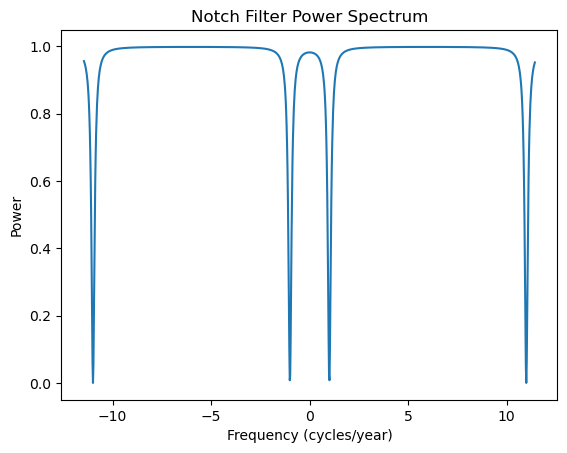

In [2]:
# Parameters
fs = 12.0
f0 = 1.0
M = 1.05
e = 0.05

# Zeros and poles
q = np.exp(-2j * np.pi * f0 / fs)
p = (1 + e) * q

# Power spectrum calculation
w = np.linspace(-fs/2, fs/2, 1000, endpoint=False)
z = np.exp(-1j * w)
P = np.abs(M * ((z - q) / (z - p)) * ((z - np.conj(q)) / (z - np.conj(p))))**2

# Plot
plt.figure()
plt.plot(w / (2 * np.pi) * fs, P)
plt.xlabel("Frequency (cycles/year)")
plt.ylabel("Power")
plt.title("Notch Filter Power Spectrum")

 3. What is the full-width-half-max (FWHM) value $f_\text{fwhm}$ of this notch filter (based on the plot)? Which parameter(s) should you change to make the notches sharper, i.e., $f_\text{fwhm}$ smaller?

In [3]:
#print(P, w) For inspection; commented out to save space

By inspection, the FWHM value of the notch filter appears to be approximately 0.25 cycles/year.

To sharpen the notches reduce the FWHM value, one should increase $\epsilon$ as it determines how much the poles are moved away from the unit circle towards the origin. A larger value of $\epsilon$ yields poles that are closer to the origin, which in turn sharpens the notch filter.

# Implementing the Notch Filter (6 marks, 2/2/1/1)

Notch filter introduced in section 1 can be written out fully as

$$ W(z) = \frac{N(z)}{D(z)} = \frac{a + bz + cz^2}{1 + Bz + Cz^2} $$

A filter of the form above can be implemented as two filters in succession: first the 'numerator filter'
`[a b c]` as a 3-term direct convolution, then the 'denominator filter' as the inverse filter of the 3-term
filter `[1 B C]` by feedback filtering.

 1. What are the values of a; b; c; B; C for the notch filter defined in Question 1.2?

Expanding out Question 1 above yields:

$$ W(z) = M \frac{z - q}{z - p} \frac{z - q^*}{z - p^*} $$
$$ = M \frac{z^2 - (q + q*)z + |q|^2}{z^2 - (p + p*)z + |p|^2} $$
$$ = M \frac{|q|^2 - (q + q*)z + z^2}{|p|^2 - (p + p*)z + z^2} $$

Accordingly, with the information from Question 1, that yields:

$a = M|q|^2 = 1.05$

$b = -M(q + q*) = -1.8186533479473213$

$c = M = 1.05$

$B = -(p + p*) = -1.8186533479473213$

$C = 1$

 2. Write a function for a general rational digital filter with numerator and denominator
    coefficients N and D which produces the filtered time series $y$ for a given input $x$,
    `y = ratFilter(N,D,x)`. 

In [4]:
def ratFilter(N, D, x):
    y1 = np.convolve(N, x, mode='full')
    y2 = np.convolve(D, y1, mode='full')
    return y2[:len(x)]

 3. Use `ratFilter` function to determine the impulse response of this notch filter (i.e., the output
    of this filter when the input is a discrete delta function). Define the impulse using $dt=1/f_s$ and $t=0$ to $t_{max}=100$ years (i.e. $1200$ samples). Plot the impulse response from $0$ to $6$ years. Speculate on how the impulse response would change if we halve the $f_\text{fwmh}$ value.

Text(0.5, 1.0, 'Notch Filter Impulse Response')

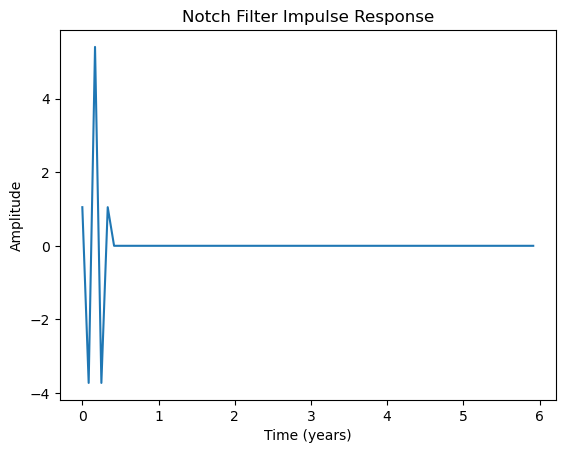

In [5]:
# Given parameters
N = [1.05, -1.8186533479473213, 1.05]
D = [1, -1.8186533479473213, 1]
t = np.arange(0, 100, 1/fs)
impulse = np.zeros_like(t)
impulse[0] = 1

impulse_response = ratFilter(N, D, impulse)

# Plot
plt.figure()
plt.plot(t[:72], impulse_response[:72]) # 6 years
plt.xlabel("Time (years)")
plt.ylabel("Amplitude")
plt.title("Notch Filter Impulse Response")

As discussed in Question 1, if the $f_\text{fwmh}$ value were to be halved, the filter would become narrower, sharpening the impulse response. A narrower notch filter will more strongly suppress the frequencies near the notch frequency, resulting in a faster impulse response decay. This would be reflected in the time domain as a shorter and more peaked impulse response.

 4. Fourier transform the impulse response to obtain the frequency response $|W(f)|$
    of this notch filter. Plot it on top of the magnitude of the theoretical spectrum calculated based on the z-transform, with $f$ ranging from $0$ to $6$ cycles per year.

In [6]:
print(len(impulse_response))

1200


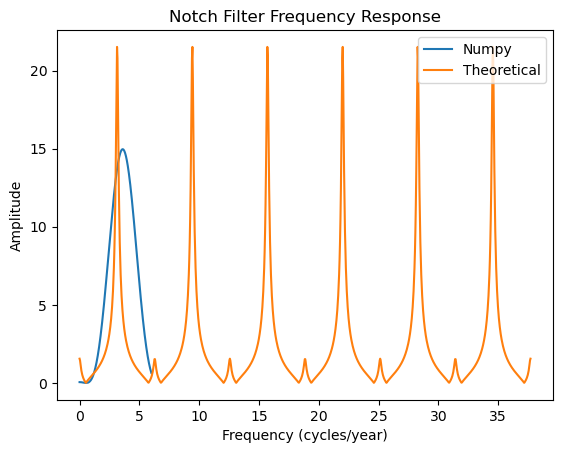

In [7]:
F = np.fft.fft(impulse_response)

# Z-transform theoretical spectrum
f = np.linspace(0, 6, 1000)
w = 2 * np.pi * f
z = np.exp(-1j * w)
P = (1.05 - 1.8186533479473213 * z + 1.05 * z**2) / (1 -1.8186533479473213 + z**2)

# Plots
plt.figure()
plt.plot(f, np.abs(F)[:len(f)], label = "Numpy")
plt.plot(w, np.abs(P), label = "Theoretical")
plt.xlabel("Frequency (cycles/year)")
plt.ylabel("Amplitude")
plt.title("Notch Filter Frequency Response")
plt.legend()

# The Mauna Loa $CO_2$ Data (6 marks, 1/1/1/1/2)

Collaborators: None

The provided file `co2data.py` contains carbon dioxide values (in parts per million) measured
every month at the Mauna Loa Observatory in Hawaii, from January 1965 to December 2022.
They show clearly a rising trend in atmospheric $CO_2$. The trend is overlaid with a strong annual
oscillation. Your job is to remove the annual oscillation and display the trend more clearly. There
are two possible approaches: (a) you could apply your notch filter to the series to remove this
annual variation, or (b) you could Fourier transform it with `fft`, remove the annual variation by
setting the spectrum at appropriate frequencies to zero, and transform back to the time domain with
`ifft`.

Write code to accomplish the following:

 1. Before applying the filters, it is helpful to remove the trend of the signal using numpy
    function `polyfit`. Fit a straight line to your data and then detrend your data by removing the
    straight line. Plot both the original data and the detrended data.

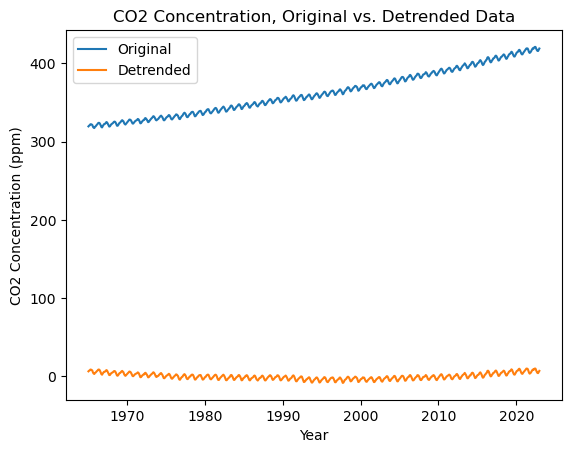

In [8]:
import co2data as co2
dat = co2.co2Data
time = np.linspace(co2.co2TimeRange[0], co2.co2TimeRange[1], len(co2.co2Data))

straight = np.polyfit(time, dat, 1)
detrend = dat - np.polyval(straight, time)

plt.figure()
plt.plot(time, dat, label = "Original")
plt.plot(time, detrend, label = "Detrended")
plt.xlabel("Year")
plt.ylabel("CO2 Concentration (ppm)")
plt.title("CO2 Concentration, Original vs. Detrended Data")
plt.legend()

 2. Apply your notch filter to the detrended data and add back the trend.

In [9]:
filtered = ratFilter(N, D, detrend)
retrend = filtered + np.polyval(straight, time)

 3. FT the detrended data into the frequency domain, and plot both its amplitude and phase
    spectrum. Make another plot that zooms in at $f = [0, 3.5]$ cycles per year. Now set the
    Fourier spectrum corresponding to frequencies beyond $0.9$ cycles per year to zero (keeping in mind symmetry requirements), which
    effectively removes the annual oscillation. Transform the spectrum back to time domain and
    add back the trend.

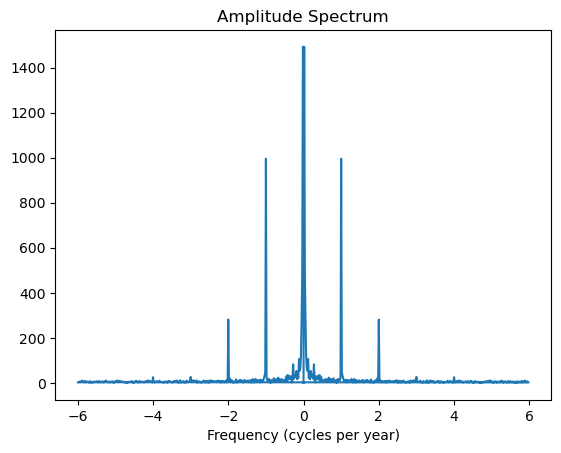

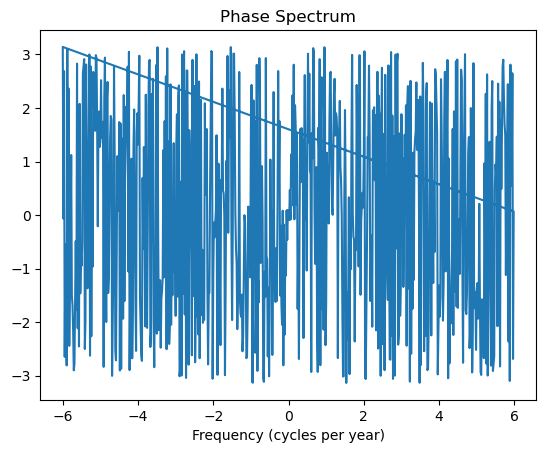

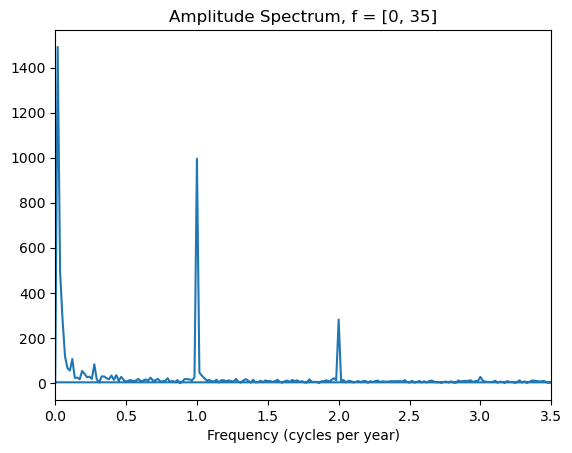

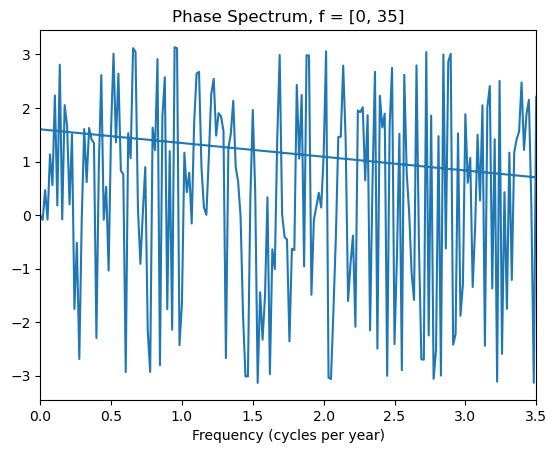

In [10]:
# Fourier transforms
ft_detrend = np.fft.fft(detrend)
f = np.fft.fftfreq(len(detrend), 1/12)

# Different spectra
amp_ft_detrend = np.abs(ft_detrend)
phase_ft_detrend = np.angle(ft_detrend)

# Plots
plt.figure()
plt.plot(f, amp_ft_detrend)
plt.xlabel('Frequency (cycles per year)')
plt.title("Amplitude Spectrum")

plt.figure()
plt.plot(f, phase_ft_detrend)
plt.xlabel('Frequency (cycles per year)')
plt.title("Phase Spectrum")

plt.figure()
plt.plot(f, amp_ft_detrend)
plt.xlim([0, 3.5])
plt.xlabel('Frequency (cycles per year)')
plt.title("Amplitude Spectrum, f = [0, 35]")

plt.figure()
plt.plot(f, phase_ft_detrend)
plt.xlim([0, 3.5])
plt.xlabel('Frequency (cycles per year)')
plt.title("Phase Spectrum, f = [0, 35]")

# Remove annual oscillation
ft_detrend_9 = ft_detrend
ft_detrend_9[(f > 0.9) | (f < -0.9)] = 0
detrend_9 = np.real(np.fft.ifft(ft_detrend_9))
retrend_9 = detrend_9 + np.polyval(straight, time)

 4. Now plot the original data, the notch-filtered data from Part 2 and f-domain filtered data
    from Part 3 on top of each other with different colors. Which method gives more satisfactory
    result? But can you think of any advantages/disadvantages in using either method?

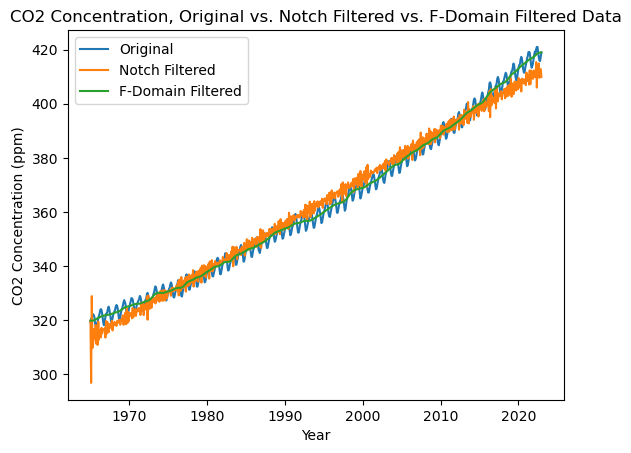

In [11]:
plt.figure()
plt.plot(time, dat, label = "Original")
plt.plot(time, retrend, label = "Notch Filtered")
plt.plot(time, retrend_9, label = "F-Domain Filtered")
plt.xlabel("Year")
plt.ylabel("CO2 Concentration (ppm)")
plt.title("CO2 Concentration, Original vs. Notch Filtered vs. F-Domain Filtered Data")
plt.legend()

As can be seen from the smooth green line, the results from f-domain filtering much better removes the seasonal oscillations than the results from notch filtering. However, unlike the notch filter, the f-domain filter relies on Fourier transforming the data, which can introduce computational problems and may not be suitable for all signals.

 5. Now try redo Parts 2, 3, and 4 with the original data, not the detrended data. Of course you
    don't need to add back the trend after filtering any more. Display your results and comment
    on the importance of detrending before applying the filters.

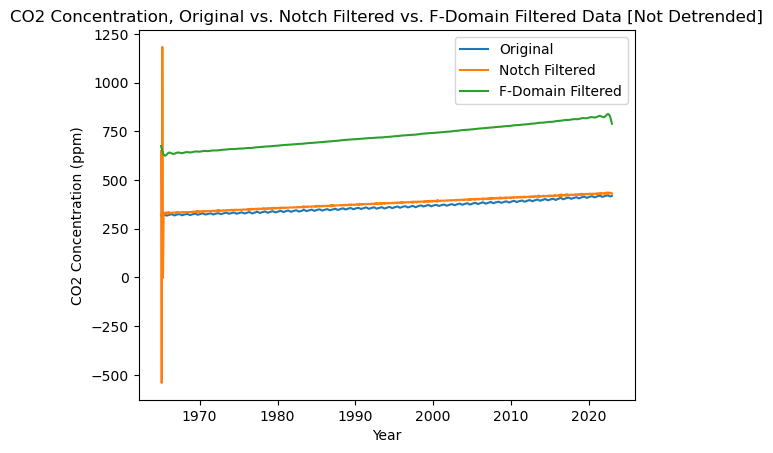

In [12]:
# Redo Part 2
filtered_2 = ratFilter(N, D, dat)
retrend_2 = filtered_2 + np.polyval(straight, time)

# Redo Part 3
ft_detrend_2 = np.fft.fft(dat)
ft_detrend_9_2 = ft_detrend_2
ft_detrend_9_2[(f > 0.9) | (f < -0.9)] = 0
detrend_9_2 = np.real(np.fft.ifft(ft_detrend_9_2))
retrend_9_2 = detrend_9_2 + np.polyval(straight, time)

# Redo Part 4
plt.figure()
plt.plot(time, dat, label = "Original")
plt.plot(time, retrend_2, label = "Notch Filtered")
plt.plot(time, retrend_9_2, label = "F-Domain Filtered")
plt.xlabel("Year")
plt.ylabel("CO2 Concentration (ppm)")
plt.title("CO2 Concentration, Original vs. Notch Filtered vs. F-Domain Filtered Data [Not Detrended]")
plt.legend()

As can be seen in the difference between the previous two plots, detrending is crucial to avoiding distortions in filtered data. Without detrending, errors can be amplified in filtered data, as can be seen in the latter plot.